# **EX3 - Unsupervised learning**

## Names and IDs

1.   Leor Ariel Rose, 208373365.


In this assignment you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visualization
6. Evaluate the performance of the clustering using Elbow methods, Silhouette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from itertools import permutations

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copied to the environment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [2]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes
 93% 38.0M/41.0M [00:00<00:00, 48.1MB/s]
100% 41.0M/41.0M [00:00<00:00, 47.1MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (dropping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [3]:
# read the csv files into dataframes
fake_df = pd.read_csv('/content/Fake.csv')
real_df = pd.read_csv('/content/True.csv')

# add labels column
fake_df['label'] = 0
real_df['label'] = 1

# create single dataframe containing a text column and a label column
news_df = fake_df.loc[:, ['text', 'label']].append(
    real_df.loc[:, ['text', 'label']], ignore_index=True)

# create indexes to fake and true news
real_idx = (news_df['label'] == 1)
fake_idx = (news_df['label'] == 0)

## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`).
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [4]:
# generate TF-IDF features
news = TfidfVectorizer(
    stop_words='english', max_features=1000).fit_transform(
        news_df['text']).toarray()

# scale the TF-IDF features
news = StandardScaler().fit_transform(news)

# apply clustering on the scaled TF-IDF features
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=42).fit(news)

## 3. Visualize using scatter plot (20 points)
The data is high dimensional, so for visualization purposes, we will perform a dimensionality reduction suing PCA.

* Apply PCA
*   Visualize the clustering in 2d using the first two PCs.
*   Visualize the clustering in 3d using the first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.

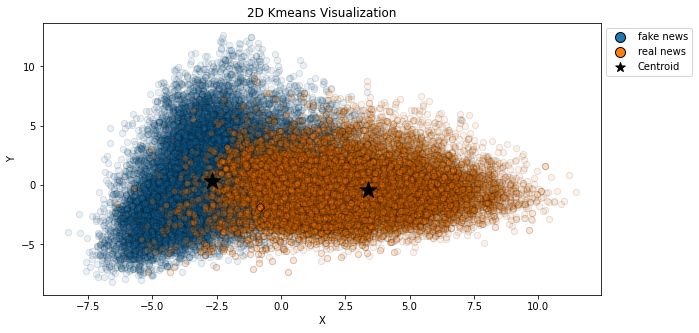

In [5]:
# reduce the scaled TF-IDF features to 2d
pca = PCA(n_components=2)
news_reduced = pca.fit_transform(news)

# get fake and real reduce scaled TF-IDF features
news_reduced_real = news_reduced[fake_idx]
news_reduced_fake = news_reduced[real_idx]

# reduce cluster centroids to 2d
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# plot 2d scatter plot of clusters    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(news_reduced_fake[:,0], news_reduced_fake[:,1],
           edgecolor='k', s=40, alpha=0.1, label="fake news")
ax.scatter(news_reduced_real[:,0], news_reduced_real[:,1],
           edgecolor='k', s=40, alpha=0.1, label="real news")
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1], s = 300,
           color='black', marker='*', label='Centroid')
ax.set_title("2D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

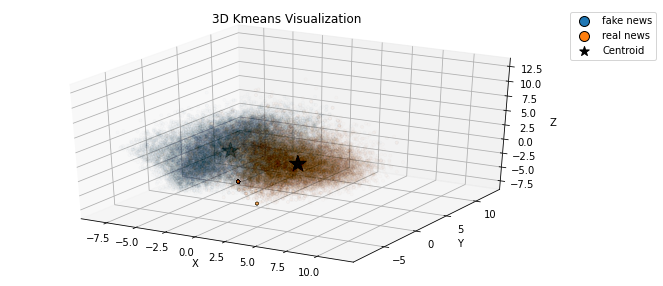

In [6]:
# reduce the scaled TF-IDF features to 3d
pca = PCA(n_components=3)
news_reduced = pca.fit_transform(news)

# get fake and real reduce scaled TF-IDF features
news_reduced_real = news_reduced[fake_idx]
news_reduced_fake = news_reduced[real_idx]

# reduce cluster centroids to 3d
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# plot 3d scatter plot of clusters
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(news_reduced_fake[:,0], news_reduced_fake[:,1], 
           news_reduced_fake[:,2], label="fake news", edgecolor='k',
           s=10, alpha = 0.01)
ax.scatter(news_reduced_real[:,0], news_reduced_real[:,1], 
           news_reduced_real[:,2], label="real news", edgecolor='k',
           s=10, alpha = 0.01)
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1], 
           centroids_reduced[:,2], s = 300, color='black',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true labels (fake/real), but we don't know which cluster corresponds to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [7]:
accuracy_fake_real = accuracy_score(kmeans.labels_, news_df['label'])
accuracy_real_fake  = accuracy_score(1 - kmeans.labels_, news_df['label'])

print("Accuracy for cluster 1 as fake and cluster "
      f"2 as real: {accuracy_fake_real}")
print("Accuracy for cluster 1 as true and cluster "
      f"2 as fake: {accuracy_real_fake}")

Accuracy for cluster 1 as fake and cluster 2 as real: 0.8709742082052653
Accuracy for cluster 1 as true and cluster 2 as fake: 0.12902579179473472


As we can see if we define cluster 1 as fake and cluster 2 as real we get ~ 0.87 accuracy.

## 5. Find optimal `k` (20 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accepts the model and the data.

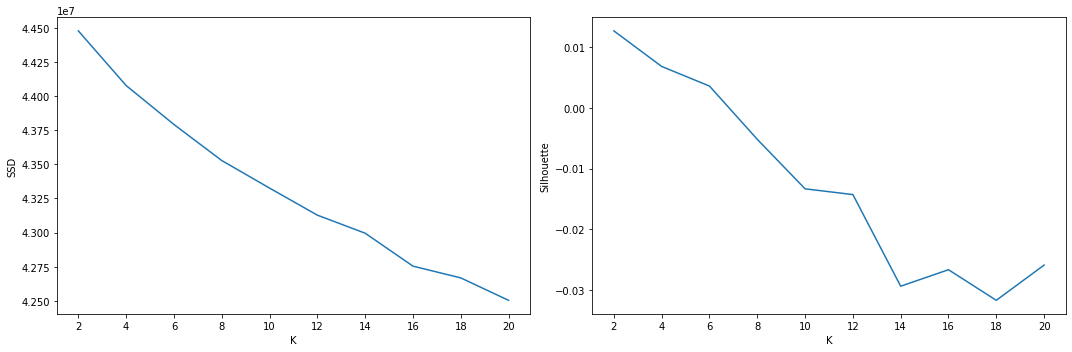

In [8]:
SSD = []
silhouette = []
cluster_numbers = list(range(2,21,2))

for k in cluster_numbers:
    # create kmeans with k
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
    # train on the sample
    kmeans.fit(news)
    # add the sum of squared distances of samples to 
    # their closest cluster center
    SSD.append(kmeans.inertia_)
    # add the silhouette coefficient
    silhouette.append(silhouette_score(
        news,  kmeans.labels_, metric='euclidean',
        random_state=42, sample_size=300))

# plot sum of squared distances for each k (elbow method)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(cluster_numbers, SSD, label='SSD')
ax[0].set_ylabel('SSD')
ax[0].set_xlabel('K')
ax[0].set_xticks(cluster_numbers)

# plot silhouette coefficient for each k
ax[1].plot(cluster_numbers, silhouette, label='Silhouette')
ax[1].set_ylabel('Silhouette')
ax[1].set_xlabel('K')
ax[1].set_xticks(cluster_numbers)
  
fig.tight_layout()
plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

From the elbow method plot we cant really know which k is the best because there is no real elbow but from the silhouette plot we can see that the k=2 has the highest silhouette value so k=2 is the best k for clustering.

As we can see k=2 but if it wasnt an explanation to this can be that because these are texts there is a different meaning for each text than fake and real for example the category (Science, Health, Games etc.) the texts belong to.

# 7. PCA then k-means (15 points)
This time, let's try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how it is compared to the previous approach, where clustering is performed w/o PCA.


In [9]:
# generate TF-IDF features
news = TfidfVectorizer(
    stop_words='english', max_features=1000).fit_transform(
        news_df['text']).toarray()

# scale the TF-IDF features
news = StandardScaler().fit_transform(news)

# apply pca on the scaled TF-IDF features for clustering
news_reduced = PCA().fit_transform(news)

# apply clustering on the scaled pca TF-IDF features
kmeans = KMeans(init="k-means++", n_clusters=2,
                random_state=42).fit(news_reduced)

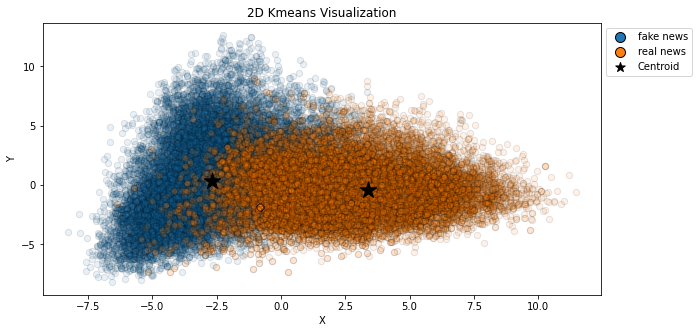

In [10]:
# get fake and real reduce scaled TF-IDF features
news_reduced_real = news_reduced[fake_idx]
news_reduced_fake = news_reduced[real_idx]

# plot 2d scatter plot of clusters    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(news_reduced_fake[:,0], news_reduced_fake[:,1],
           edgecolor='k', s=40, alpha=0.1, label="fake news")
ax.scatter(news_reduced_real[:,0], news_reduced_real[:,1],
           edgecolor='k', s=40, alpha=0.1, label="real news")
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300,
           color='black', marker='*', label='Centroid')
ax.set_title("2D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

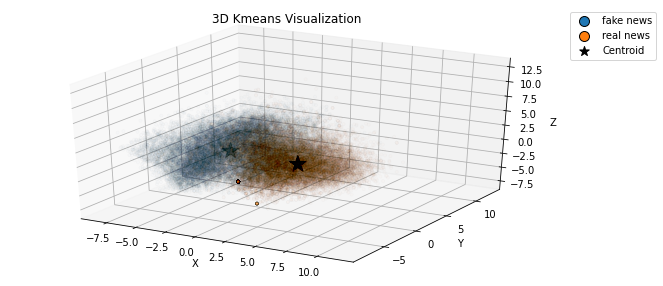

In [11]:
# plot 3d scatter plot of clusters
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(news_reduced_fake[:,0], news_reduced_fake[:,1], 
           news_reduced_fake[:,2], label="fake news", edgecolor='k',
           s=10, alpha = 0.01)
ax.scatter(news_reduced_real[:,0], news_reduced_real[:,1], 
           news_reduced_real[:,2], label="real news", edgecolor='k',
           s=10, alpha = 0.01)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], s = 300, color='black',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

In [12]:
accuracy_fake_real = accuracy_score(kmeans.labels_, news_df['label'])
accuracy_real_fake  = accuracy_score(1 - kmeans.labels_, news_df['label'])

print("Accuracy for cluster 1 as fake and cluster "
      f"2 as real: {accuracy_fake_real}")
print("Accuracy for cluster 1 as true and cluster "
      f"2 as fake: {accuracy_real_fake}")

Accuracy for cluster 1 as fake and cluster 2 as real: 0.8709742082052653
Accuracy for cluster 1 as true and cluster 2 as fake: 0.12902579179473472


Looks like the accuracy and visualization is somewhat the same as the previous approach.

# Bonus (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10?
2. What is the optimal k?
3. How do the results change if you first run PCA?

load and scale data:

In [13]:
# load mnist data
data, labels = load_digits(return_X_y=True)

# Scale the data
mnist = StandardScaler().fit_transform(data)

### ***k-means then PCA***

Cluster the samples into 10 clusters:

In [14]:
# apply clustering on the scaled data
kmeans = KMeans(init="k-means++", n_clusters=10, random_state=42).fit(mnist)

Visualize using 2d scatter plot:

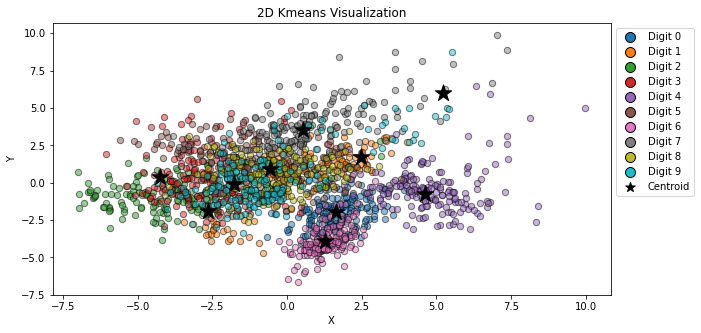

In [15]:
# reduce the scaled data to 2d
pca = PCA(n_components=2)
mnist_reduced = pca.fit_transform(mnist)

# reduce cluster centroids to 2d
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# plot 2d scatter plot of clusters    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for i in range(0, 10):
    ax.scatter(mnist_reduced[labels==i,0], mnist_reduced[labels==i,1],
               edgecolor='k', s=40, alpha = 0.5, label=f"Digit {i}")
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1],
           s = 300, c = 'black', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

Visualize using 3d scatter plot:

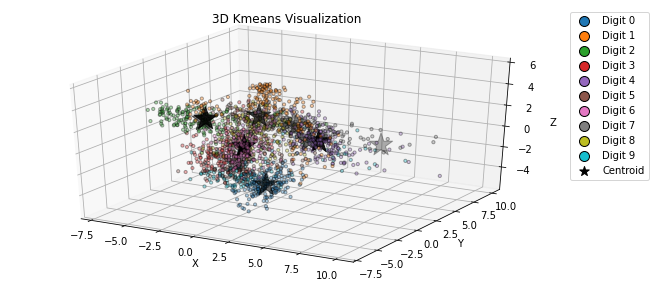

In [16]:
# reduce the scaled data to 3d
pca = PCA(n_components=3)
mnist_reduced = pca.fit_transform(mnist)

# reduce cluster centroids to 3d
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# plot 3d scatter plot of clusters
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(0, 10):
    ax.scatter(mnist_reduced[labels==i,0], mnist_reduced[labels==i,1], 
            mnist_reduced[labels==i,2], edgecolor='k', s=10, alpha = 0.35,
            label=f"Digit {i}")
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1], 
           centroids_reduced[:,2], s = 600, c = 'black',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

Performance evaluation:

In [17]:
# create empty array for predicted labels
pred_labels = np.zeros(labels.shape)

# loop over each digit
for i in range(0, 10):
    # get cluster real labels index
    idx = kmeans.labels_ == i
    # count each label in cluster
    counts = np.bincount(labels[idx])
    # assign most frequent label in cluster
    pred_labels[idx] = np.argmax(counts)

# print accuracy
print(f"Accuracy {accuracy_score(labels, pred_labels)}")

Accuracy 0.6210350584307178


Find optimal k:

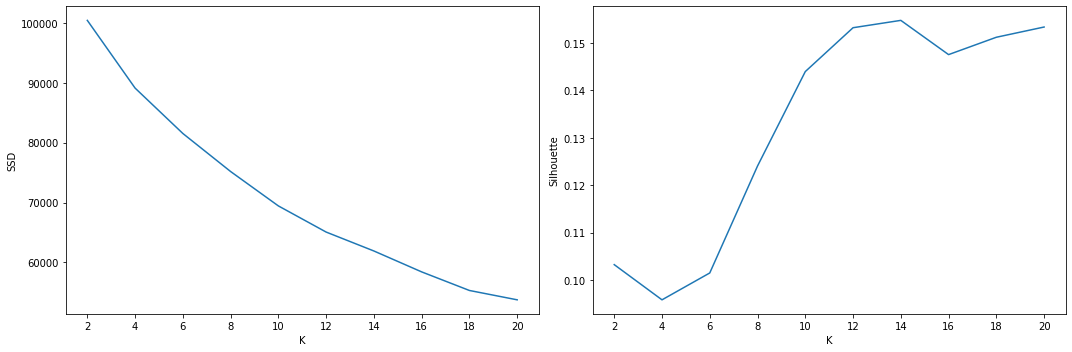

In [18]:
SSD = []
silhouette = []
cluster_numbers = list(range(2,21,2))

for k in cluster_numbers:
    # create kmeans with k
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
    # train on the sample
    kmeans.fit(mnist)
    # add the sum of squared distances of samples to 
    # their closest cluster center
    SSD.append(kmeans.inertia_)
    # add the silhouette coefficient
    silhouette.append(silhouette_score(
        mnist,  kmeans.labels_, metric='euclidean',
        random_state=42))

# plot sum of squared distances for each k (elbow method)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(cluster_numbers, SSD, label='SSD')
ax[0].set_ylabel('SSD')
ax[0].set_xlabel('K')
ax[0].set_xticks(cluster_numbers)

# plot silhouette coefficient for each k
ax[1].plot(cluster_numbers, silhouette, label='Silhouette')
ax[1].set_ylabel('Silhouette')
ax[1].set_xlabel('K')
ax[1].set_xticks(cluster_numbers)
  
fig.tight_layout()
plt.show()

### ***PCA then k-means***

PCA then k-means:

In [19]:
# apply pca on scalled mnist
mnist_reduced = PCA().fit_transform(mnist)

# apply clustering on the scaled pca mnist
kmeans = KMeans(init="k-means++", n_clusters=10,
                random_state=42).fit(mnist_reduced)

Visualize using 2d scatter plot:

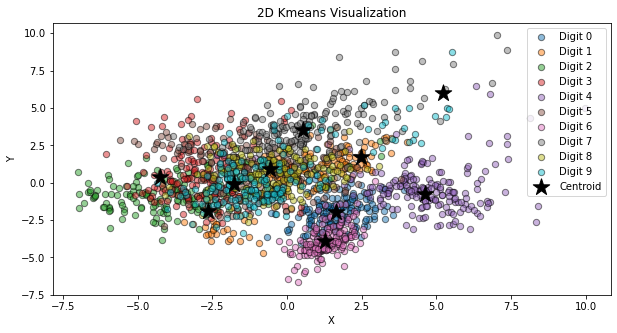

In [20]:
# plot 2d scatter plot of clusters    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for i in range(0, 10):
    ax.scatter(mnist_reduced[labels==i,0], mnist_reduced[labels==i,1],
               edgecolor='k', s=40, alpha = 0.5, label=f"Digit {i}")
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'black', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.legend()
plt.show()

Visualize using 3d scatter plot:

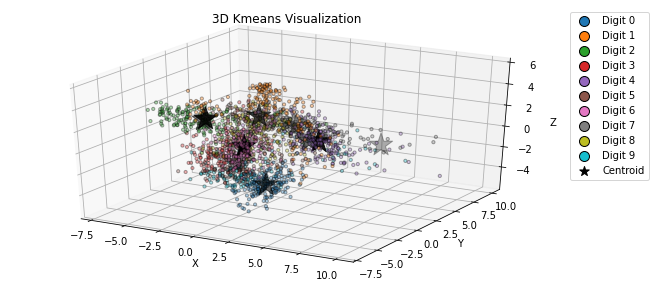

In [21]:
# plot 3d scatter plot of clusters
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(0, 10):
    ax.scatter(mnist_reduced[labels==i,0], mnist_reduced[labels==i,1], 
            mnist_reduced[labels==i,2], edgecolor='k', s=10, alpha = 0.35,
            label=f"Digit {i}")
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1], 
           centroids_reduced[:,2], s = 600, c = 'black',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
leg = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
for l in leg.legendHandles:
    l.set_alpha(1)
    l.set_sizes([100])
plt.show()

Performance evaluation:

In [22]:
# create empty array for predicted labels
pred_labels = np.zeros(labels.shape)

# loop over each digit
for i in range(0, 10):
    # get cluster real labels index
    idx = kmeans.labels_ == i
    # count each label in cluster
    counts = np.bincount(labels[idx])
    # assign most frequent label in cluster
    pred_labels[idx] = np.argmax(counts)

# print accuracy
print(f"Accuracy {accuracy_score(labels, pred_labels)}")

Accuracy 0.6210350584307178


### Answers:

1. The accuracy of the clustering when using k=10 is 0.6210350584307178.

2. The optimal k is 14. From the elbow method plot we cant really know which k is the best because there is no real elbow but from the silhouette plot we can see that the k=14 has the highest silhouette value so k=14 is the best k for clustering.

3. If we first run PCA and then apply clustering the accuracy and visualization are somewhat the same.